# Estimating Gestational Diabetes Onset
### Reverse Timeseries Forecasting

## FINAL MODEL

<ul>
    <li><a href="#Imports"><strong>Imports</strong></a></li>
    <li><a href="#Notebook-Settings"><strong>Notebook Settings</strong></a></li>
    <li><a href="#Load-the-data"><strong>Loading the data</strong></a></li>
    <li><a href="#Model:-ARIMA"><strong>Model: ARIMA</strong></a>
        <ul>
            <li>Optimizing Parameters</li>
            <li>Fitting the Model</li>
            <li>Predictions</li>
        </ul>
    </li>
</ul>


### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

from library.functions import jlcap_optimize_arima

### Notebook Settings

In [2]:
pd.set_option('display.max_rows', 500)

### Loading the data

In [10]:
y = pd.read_csv('data/data_avg_pre-processed.csv')
y.set_index('date_forward', inplace=True)
y.index = pd.DatetimeIndex(y.index, freq="D")
y.mean()

bg_avg    112.459459
dtype: float64

## Model: ARIMA

**Fit the model**

In [5]:
model = ARIMA(y, order=(3,0,3))
result = model.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Predictions!**

In [6]:
preds = result.forecast(steps=30)
preds.rename('bg_avg', inplace=True)
y_pred = pd.DataFrame(preds)
y_pred.head()

,bg_avg
2021-05-24,111.652131
2021-05-25,108.606100
2021-05-26,111.461775
2021-05-27,109.232109
2021-05-28,111.626805


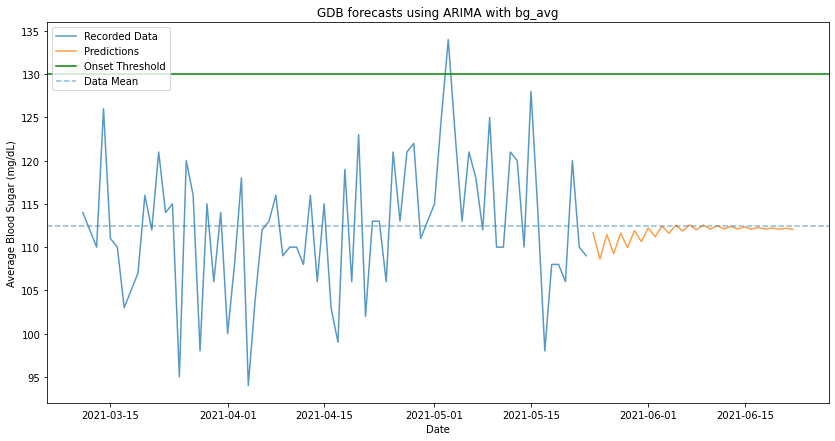

In [17]:
recorded_days = pd.Series(y.index)
predicted_days = pd.Series(y_pred.index)

bg_avg_threshold = 130
y_mean = y.mean().bg_avg

plt.figure(figsize=(14,7))

plt.plot(recorded_days, y, alpha=0.75, label='Recorded Data')
plt.plot(predicted_days, y_pred, alpha=0.75, label='Predictions')  # Predictions

plt.axhline(bg_avg_threshold, c='g', label='Onset Threshold')
plt.axhline(y_mean, label='Data Mean', ls='--', alpha=.5)

plt.title("GDB forecasts using ARIMA with bg_avg")
plt.xlabel("Date")
plt.ylabel("Average Blood Sugar (mg/dL)")
plt.legend(loc='upper left')

plt.savefig('vis/arima_avg_final.png', bbox_inches="tight")
plt.show()

#### Well that didn't work

In [19]:
daily = pd.read_csv('data/daily_cleaned.csv')
daily.date = pd.to_datetime(daily.date)
daily.set_index('date')

,daycount,bg_fasting,bg_avg,carbs_sum,meds_dose
date,,,,,
2021-03-11,1,104.0,109,138,0
2021-03-12,2,101.0,110,157,0
2021-03-13,3,96.0,120,154,0
2021-03-14,4,93.0,106,87,0
2021-03-15,5,89.0,108,135,0
2021-03-16,6,92.0,108,110,0
2021-03-17,7,100.0,98,151,0
2021-03-18,8,98.0,114,136,0
2021-03-19,9,100.0,128,136,0


In [20]:
daily_reverse = daily.iloc[::-1]
daily_reverse.set_index('date', inplace=True)
daily_reverse.index = pd.DatetimeIndex(daily_reverse.index, freq="-1D")

In [31]:
y_reverse = daily_reverse.bg_avg
y_reverse.tail()

date
2021-03-15    108
2021-03-14    106
2021-03-13    120
2021-03-12    110
2021-03-11    109
Freq: -1D, Name: bg_avg, dtype: int64

In [22]:
model_reverse = ARIMA(y_reverse, order=(3,0,3))
result_reverse = model_reverse.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [40]:
preds_reverse = result_reverse.forecast(steps=30)
preds_reverse.rename('bg_avg', inplace=True)
y_pred_reverse = pd.DataFrame(preds_reverse)
y_pred_reverse.head()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: DeprecationWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,bg_avg
74,111.652131
75,108.606100
76,111.461775
77,109.232109
78,111.626805


In [41]:
preds_reverse_index = pd.date_range(start='3/10/2021', periods=30, freq='-1D')

In [42]:
y_pred_reverse.shape, preds_reverse_index.shape

((30, 1), (30,))

In [44]:
y_pred_reverse.set_index(preds_reverse_index, inplace=True)

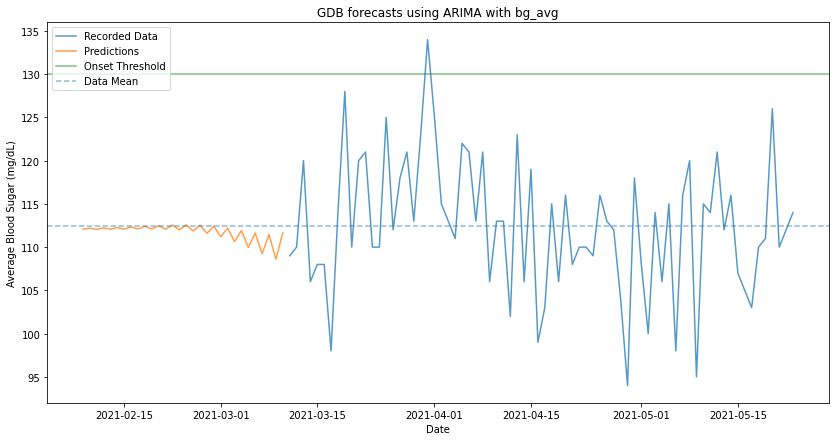

In [48]:
recorded_days_reverse = pd.Series(y_reverse.index)
predicted_days_reverse = pd.Series(y_pred_reverse.index)

bg_avg_threshold = 130
y_mean_reverse = y_reverse.mean()

plt.figure(figsize=(14,7))

plt.plot(recorded_days_reverse, y_reverse, alpha=0.75, label='Recorded Data')
plt.plot(predicted_days_reverse, y_pred_reverse, alpha=0.75, label='Predictions')  # Predictions

plt.axhline(bg_avg_threshold, c='g', label='Onset Threshold', alpha=.5)
plt.axhline(y_mean_reverse, label='Data Mean', ls='--', alpha=.5)

plt.title("GDB forecasts using ARIMA with bg_avg")
plt.xlabel("Date")
plt.ylabel("Average Blood Sugar (mg/dL)")
plt.legend(loc='upper left')

plt.savefig('vis/arima_avg_final_reversed.png', bbox_inches="tight")
plt.show()

## Just for giggles, let's try the other top model

In [55]:
y_full = pd.read_csv('data/data_full_pre-processed.csv')
y_full.set_index('datetime_forward', inplace=True)
y_full.index = pd.DatetimeIndex(y_full.index)

In [56]:
# full_reverse = full.iloc[::-1]
# full_reverse.set_index('datetime', inplace=True)
# full_reverse.head()

In [60]:
y_full.tail(1)

,value
datetime_forward,
2021-05-23 21:56:00,104


In [58]:
model_full = ARIMA(y_full, order=(7,0,5))
result_full = model_full.fit()

In [65]:
preds_full = result_full.forecast(steps=80)
preds_full.rename('value', inplace=True)
y_pred_full = pd.DataFrame(preds_full)
y_pred_full.tail()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: DeprecationWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,value
355,105.401891
356,112.790298
357,110.276425
358,102.976918
359,105.587192


In [66]:
preds_full_index = pd.date_range(start='2021-05-23 21:56:00', periods=80, freq='6H')
preds_full_index

DatetimeIndex(['2021-05-23 21:56:00', '2021-05-24 03:56:00',
               '2021-05-24 09:56:00', '2021-05-24 15:56:00',
               '2021-05-24 21:56:00', '2021-05-25 03:56:00',
               '2021-05-25 09:56:00', '2021-05-25 15:56:00',
               '2021-05-25 21:56:00', '2021-05-26 03:56:00',
               '2021-05-26 09:56:00', '2021-05-26 15:56:00',
               '2021-05-26 21:56:00', '2021-05-27 03:56:00',
               '2021-05-27 09:56:00', '2021-05-27 15:56:00',
               '2021-05-27 21:56:00', '2021-05-28 03:56:00',
               '2021-05-28 09:56:00', '2021-05-28 15:56:00',
               '2021-05-28 21:56:00', '2021-05-29 03:56:00',
               '2021-05-29 09:56:00', '2021-05-29 15:56:00',
               '2021-05-29 21:56:00', '2021-05-30 03:56:00',
               '2021-05-30 09:56:00', '2021-05-30 15:56:00',
               '2021-05-30 21:56:00', '2021-05-31 03:56:00',
               '2021-05-31 09:56:00', '2021-05-31 15:56:00',
               '2021-05-

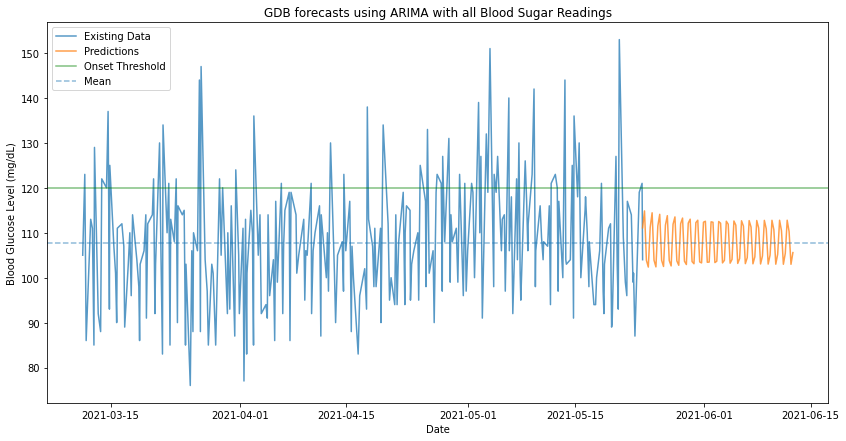

In [69]:
# Plot the points and the forecasts
existing_datetimes = pd.Series(y_full.index)

bg_avg_threshold = 120
y_full_mean = y_full.mean().value

plt.figure(figsize=(14,7))

plt.plot(existing_datetimes, y_full, alpha=0.75, label='Existing Data')
plt.plot(preds_full_index, y_pred_full, alpha=0.75, label='Predictions')  # Forecasts

plt.axhline(bg_avg_threshold, c='g', label='Onset Threshold', alpha=.5)
plt.axhline(y_full_mean, label='Mean', ls='--', alpha=.5)

plt.title("GDB forecasts using ARIMA with all Blood Sugar Readings")
plt.xlabel("Date")
plt.ylabel("Blood Glucose Level (mg/dL)")
plt.legend(loc='upper left')

# plt.savefig('vis/arima_full_final.png', bbox_inches="tight")
plt.show()